In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.


5


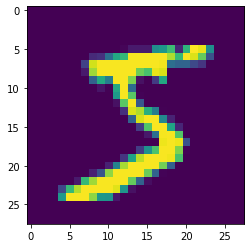

In [2]:
# import mnist data and visualize first image
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0])
print(y_train[0])

In [3]:
# scale data and reshape
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

# The -1 parameter means numpy should just guess what the first dimension is.
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [4]:
# make output a 10 dim vector indicating class
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(y_train[0])
print(Y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [5]:
# create neural network (in this case a simple logistic regression)
model = Sequential()

# Softmax ensures all digit values add to 1.
model.add(Dense(10, activation='softmax',input_shape=(28*28,)))


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# compile model.  to train the neural network we use stochastic gradient descent
sgd=optimizers.SGD(lr=.01) 
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [7]:
# perform 10 epochs of sgd, meaning we pass over the data set 10 times
# for each iteration of sgd we average gradient over 500 samples (batch size)
# we hold out some data and compute error on that held out data to see how we are doing
model.fit(X_train, Y_train,
          batch_size=500, nb_epoch=10,verbose=1,
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


60000/60000 [==============================] - 1s 14us/step - loss: 1.8816 - acc: 0.4421 - val_loss: 1.4936 - val_acc: 0.6866
Epoch 2/10
60000/60000 [==============================] - 0s 8us/step - loss: 1.2997 - acc: 0.7375 - val_loss: 1.1148 - val_acc: 0.7826
Epoch 3/10
60000/60000 [==============================] - 1s 15us/step - loss: 1.0318 - acc: 0.7916 - val_loss: 0.9227 - val_acc: 0.8170
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.8848 - acc: 0.8150 - val_loss: 0.8085 - val_acc: 0.8337
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.7921 - acc: 0.8283 - val_loss: 0.7326 - val_acc: 0.8424
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.7280 - acc: 0.8376 - val_loss: 0.6782 - val_acc: 0.8500
Epoch 7/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.6807 - acc: 0.8439 - val_loss: 0.6371 - val_acc: 0.8567
Epoch 8/10
60000/60000 [=============================

In [8]:
# make predictions
Y_test_pred = model.predict_classes(X_test)

6 5


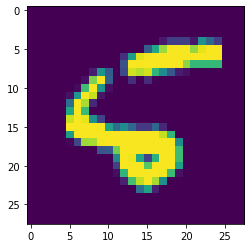

In [9]:
# Check what happened with mis-classified examples
wrong_images = np.nonzero(Y_test_pred != y_test)[0]
plt.imshow(X_test[wrong_images[0],].reshape(28,28))
print(Y_test_pred[wrong_images[0]], y_test[wrong_images[0]])